## Import Library

In [116]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset

In [117]:
df = pd.read_csv('data.csv')
df.head()

,order_id,customers,city,state,order_date,total_units,revenue,product_name,category_name,brand_name,store_name,sales_rep
0,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,1199.98,Electra Townie Original 7D EQ - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
1,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,599.99,Electra Townie Original 7D EQ - Women's - 2016,Cruisers Bicycles,Electra,Santa Cruz Bikes,Mireya Copeland
2,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3098.00,Surly Straggler - 2016,Cyclocross Bicycles,Surly,Santa Cruz Bikes,Mireya Copeland
3,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,1,2899.99,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland
4,1,Johnathan Velazquez,Pleasanton,CA,1/1/2016,2,3599.98,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek,Santa Cruz Bikes,Mireya Copeland


##  Data Dictionary & Data Quality Assessment

### About data

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       4707 non-null   int64  
 1   customers      4707 non-null   object 
 2   city           4707 non-null   object 
 3   state          4707 non-null   object 
 4   order_date     4707 non-null   object 
 5   total_units    4707 non-null   int64  
 6   revenue        4707 non-null   float64
 7   product_name   4707 non-null   object 
 8   category_name  4707 non-null   object 
 9   brand_name     4707 non-null   object 
 10  store_name     4707 non-null   object 
 11  sales_rep      4707 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 441.4+ KB


In [119]:
df.describe()

,order_id,total_units,revenue
count,4707.000000,4707.000000,4707.000000
mean,820.016996,1.498619,1821.837502
std,465.142301,0.500051,2229.923391
min,1.000000,1.000000,89.990000
25%,422.500000,1.000000,539.980000
50%,827.000000,1.000000,939.980000
75%,1225.000000,2.000000,1999.980000
max,1615.000000,2.000000,23999.980000


In [120]:
df.nunique()

order_id         1615
customers        1444
city              195
state               3
order_date        725
total_units         2
revenue           200
product_name      277
category_name       7
brand_name          9
store_name          3
sales_rep           6
dtype: int64

### Convert data

In [121]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       4707 non-null   int64         
 1   customers      4707 non-null   object        
 2   city           4707 non-null   object        
 3   state          4707 non-null   object        
 4   order_date     4707 non-null   datetime64[ns]
 5   total_units    4707 non-null   int64         
 6   revenue        4707 non-null   float64       
 7   product_name   4707 non-null   object        
 8   category_name  4707 non-null   object        
 9   brand_name     4707 non-null   object        
 10  store_name     4707 non-null   object        
 11  sales_rep      4707 non-null   object        
 12  year           4707 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(8)
memory usage: 459.8+ KB


###  Check duplicate values

In [122]:
df[df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       4707 non-null   int64         
 1   customers      4707 non-null   object        
 2   city           4707 non-null   object        
 3   state          4707 non-null   object        
 4   order_date     4707 non-null   datetime64[ns]
 5   total_units    4707 non-null   int64         
 6   revenue        4707 non-null   float64       
 7   product_name   4707 non-null   object        
 8   category_name  4707 non-null   object        
 9   brand_name     4707 non-null   object        
 10  store_name     4707 non-null   object        
 11  sales_rep      4707 non-null   object        
 12  year           4707 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(8)
memory usage: 459.8+ KB


### Check missing values

In [123]:
df.isnull().sum()

order_id         0
customers        0
city             0
state            0
order_date       0
total_units      0
revenue          0
product_name     0
category_name    0
brand_name       0
store_name       0
sales_rep        0
year             0
dtype: int64

## EDA

In [124]:
df.columns

Index(['order_id', 'customers', 'city', 'state', 'order_date', 'total_units',
       'revenue', 'product_name', 'category_name', 'brand_name', 'store_name',
       'sales_rep', 'year'],
      dtype='object')

### The number of customer by state 

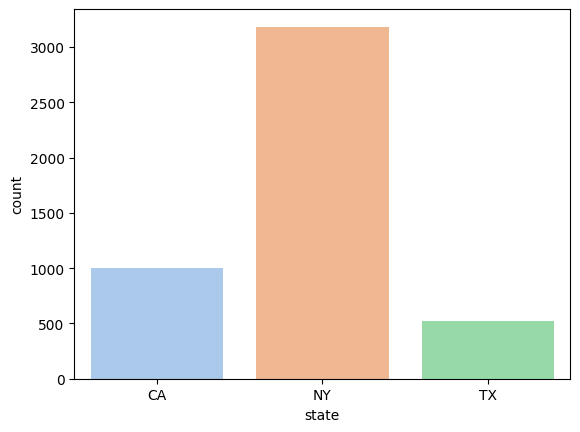

In [125]:
sns.countplot(data=df, x='state', palette='pastel')
plt.show()

- Customers in the NY area are the largest.

### The average revenue of each store by year

In [126]:
avg_revenue = df.groupby(['state', 'year']).agg({'revenue': 'mean'}).reset_index()
avg_revenue

,state,year,revenue
0,CA,2016,1637.877786
1,CA,2017,1657.716711
2,CA,2018,2219.742845
3,NY,2016,1476.891940
4,NY,2017,1913.515436
5,NY,2018,2395.963315
6,TX,2016,1636.107760
7,TX,2017,1901.546414
8,TX,2018,2122.265600


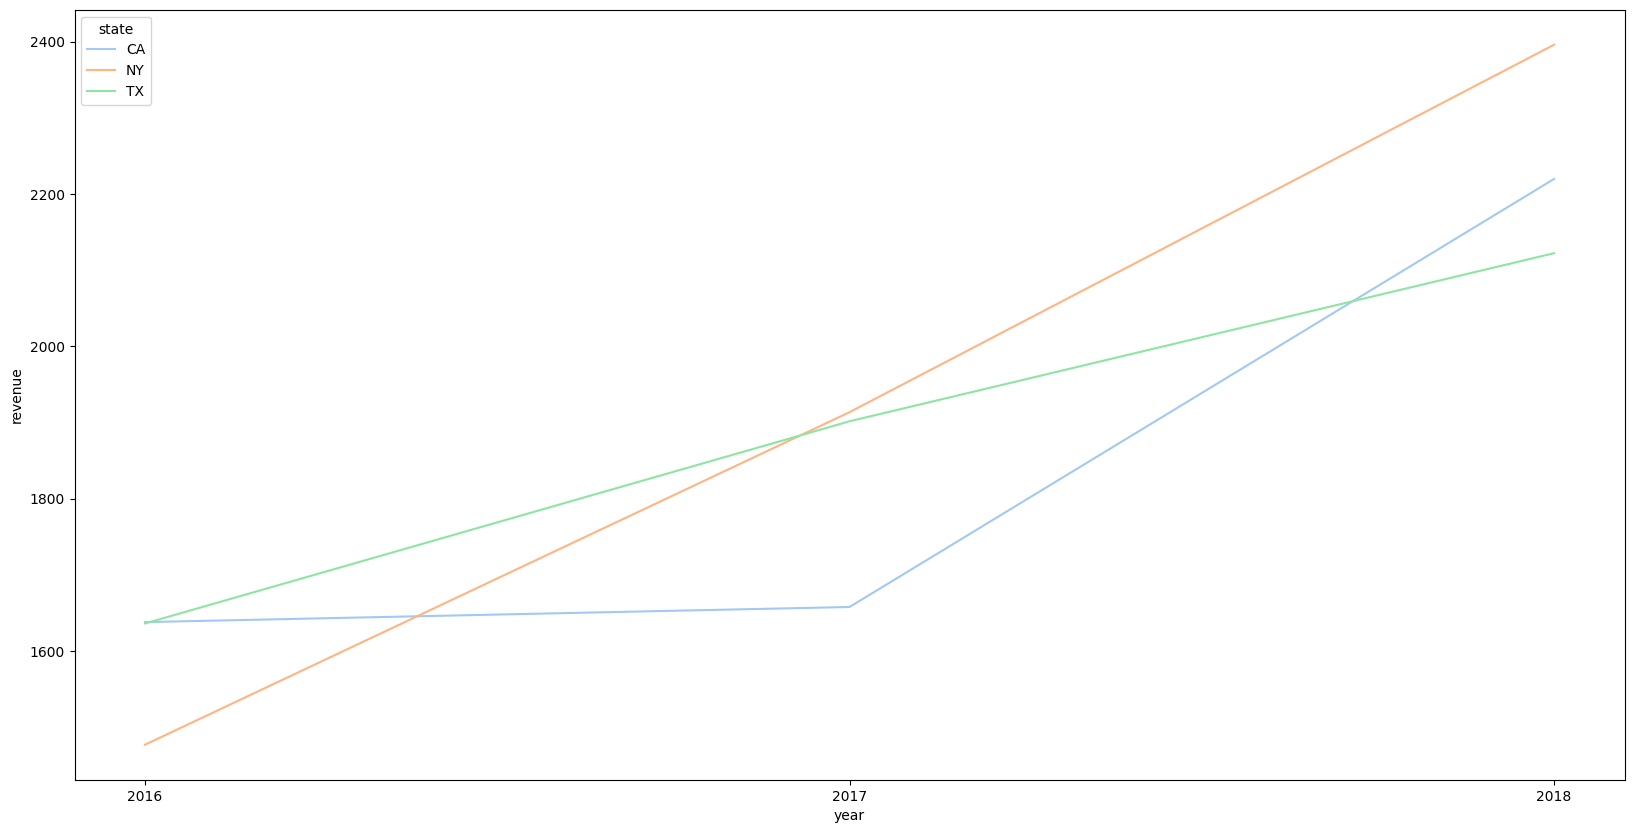

In [127]:
plt.figure(figsize=(20,10))
sns.lineplot(avg_revenue, x='year',y='revenue', hue='state', palette='pastel')
plt.xticks(ticks=range(avg_revenue['year'].min(), avg_revenue['year'].max() + 1))
plt.show()

- The growth rate across all areas has increased, with the NY area experiencing the highest growth rate.

### Top 5 Customer

In [128]:
top_customer = df.groupby(['customers']).agg({'revenue': 'mean'}).reset_index()
top_customer = top_customer.sort_values(by='revenue', ascending=False)
top_customer.head(5)

,customers,revenue
535,Hae Ramirez,12999.98
457,Ester Acevedo,9999.98
930,Marilyn Frank,9999.98
870,Lorrie Pollard,7999.98
1144,Rona Rojas,7999.98


### Top 3 Sales rep

In [129]:
top_sales_rep = df.groupby(['sales_rep']).agg({'revenue': 'mean'}).reset_index()
top_sales_rep = top_sales_rep.sort_values(by='revenue', ascending=False)
top_sales_rep.head(5)

,sales_rep,revenue
1,Kali Vargas,1926.847724
5,Venita Daniel,1832.478451
3,Marcelene Boyer,1825.692244
4,Mireya Copeland,1815.886486
2,Layla Terrell,1769.466627
